###  Predict the optimum number of clusters for IRIS dataset and represent it visually

In [1]:
#importing libraries for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#collecting the data
#link = 'http://bit.ly/3kXTdox'
link = 'C:/Users/AYUSHI MISHRA/Desktop/TSF/Iris.csv'
data = pd.read_csv(link)
print('Data collection successfull')

Data collection successfull


In [5]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
print(data.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


### Checking for NaN Values

In [7]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### There are no NaN values in the dataset.

### Printing the statistical description of the dataset

In [9]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000



Since , there are no NaN values in the dataset we can move forward and check for the number of classes of species present in the dataset

### Number of unique classes in the dataset and their decription

In [10]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


### DATA VISUALISATION

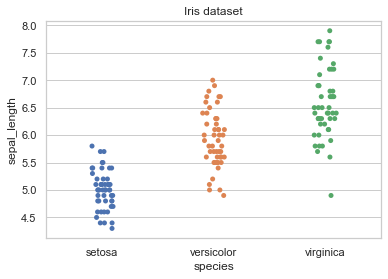

In [11]:
import seaborn as sns
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris dataset')
plt.show()

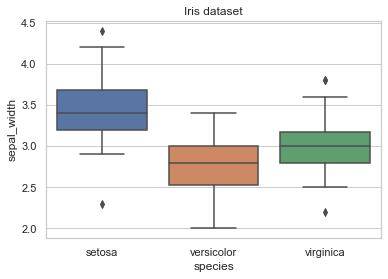

In [12]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris dataset")
plt.show()

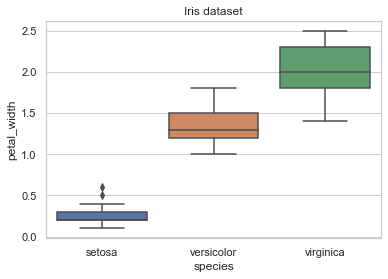

In [13]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris dataset")
plt.show()

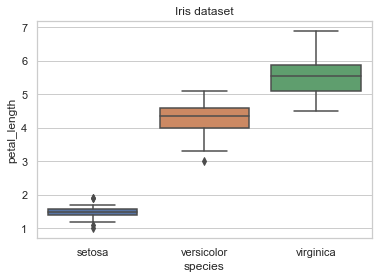

In [14]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris dataset")
plt.show()

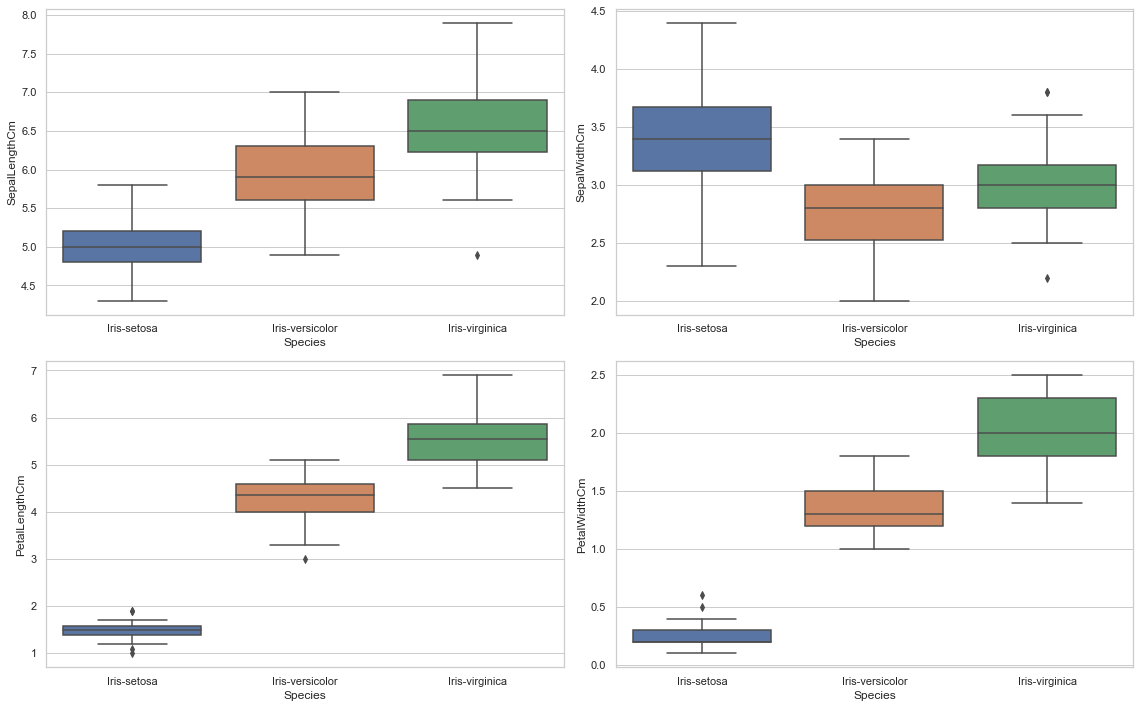

In [15]:

fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
df = data.drop(['Id'], axis=1)
for i in range(4):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Species'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

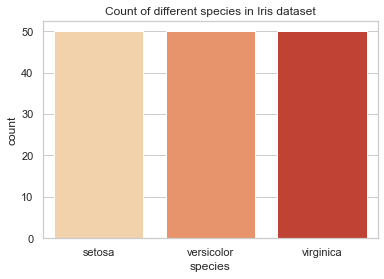

In [16]:

# count plot
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

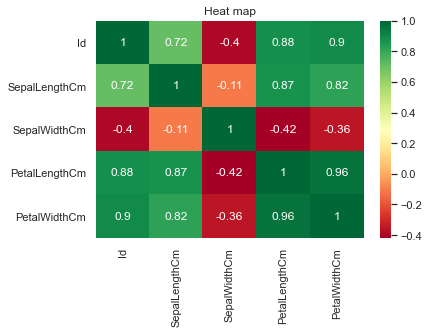

In [17]:
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')
plt.title("Heat map")
plt.show()

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

In [19]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


### Finding the optimum number of cluster for k -means classification

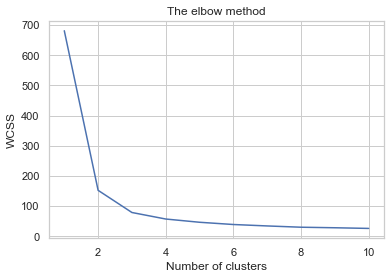

In [20]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting the results onto a line graph,
#allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()